# Dataset Overview
## i.Load the dataset force2020_data.csv

In [150]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
data=pd.read_csv("H:\\data science\\Case_study\\force2020_data.csv")

In [154]:
data

RHOB         GR  DEPTH_MD      NPHI        PEF         DTC
0      1.884186  80.200851   494.528       NaN  20.915468  161.131180
1      1.889794  79.262886   494.680       NaN  19.383013  160.603470
2      1.896523  74.821999   494.832       NaN  22.591518  160.173615
3      1.891913  72.878922   494.984       NaN  32.191910  160.149429
4      1.880034  71.729141   495.136       NaN  38.495632  160.128342
...         ...        ...       ...       ...        ...         ...
18265  2.630211  19.418915  3271.416  0.187811        NaN         NaN
18266  2.643114  21.444370  3271.568  0.185574        NaN         NaN
18267  2.681300  22.646879  3271.720  0.176074        NaN         NaN
18268  2.738337  22.253584  3271.872  0.174617        NaN         NaN
18269  2.792922  19.829920  3272.024  0.176627        NaN         NaN

[18270 rows x 6 columns]

## ii. Display basic information about the dataset using .info() and .describe() to understand the features, data types, and any initial insights into missing values.

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


#### As per the information from the above function: 

##### i. There are 18270 rows and 6 columns in the House_Pricing dataset.
##### ii. there is missing values in the respective dataset.
##### iii. Datatypes are float.


In [160]:
data.describe()

RHOB            GR      DEPTH_MD          NPHI           PEF  \
count  18270.000000  18270.000000  18270.000000  14032.000000  16440.000000   
mean       2.110451     63.847477   1883.228478      0.404547      3.463851   
std        0.297725     28.636331    801.941195      0.133532      2.561239   
min        1.404576      6.191506    494.528000      0.024330      1.010027   
25%        1.963399     43.866690   1188.750000      0.315346      2.320836   
50%        2.055079     66.777851   1882.972000      0.448527      2.790249   
75%        2.381963     81.542681   2577.802000      0.506343      4.267342   
max        2.927888    499.022583   3272.024000      0.800262     66.030319   

                DTC  
count  18189.000000  
mean     125.106178  
std       30.618337  
min       55.726753  
25%       90.883087  
50%      141.300461  
75%      148.048355  
max      175.953140

In [162]:
data.isna()

RHOB     GR  DEPTH_MD   NPHI    PEF    DTC
0      False  False     False   True  False  False
1      False  False     False   True  False  False
2      False  False     False   True  False  False
3      False  False     False   True  False  False
4      False  False     False   True  False  False
...      ...    ...       ...    ...    ...    ...
18265  False  False     False  False   True   True
18266  False  False     False  False   True   True
18267  False  False     False  False   True   True
18268  False  False     False  False   True   True
18269  False  False     False  False   True   True

[18270 rows x 6 columns]

In [164]:
data.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [166]:
num_df=data.select_dtypes(include="number")
num_df

RHOB         GR  DEPTH_MD      NPHI        PEF         DTC
0      1.884186  80.200851   494.528       NaN  20.915468  161.131180
1      1.889794  79.262886   494.680       NaN  19.383013  160.603470
2      1.896523  74.821999   494.832       NaN  22.591518  160.173615
3      1.891913  72.878922   494.984       NaN  32.191910  160.149429
4      1.880034  71.729141   495.136       NaN  38.495632  160.128342
...         ...        ...       ...       ...        ...         ...
18265  2.630211  19.418915  3271.416  0.187811        NaN         NaN
18266  2.643114  21.444370  3271.568  0.185574        NaN         NaN
18267  2.681300  22.646879  3271.720  0.176074        NaN         NaN
18268  2.738337  22.253584  3271.872  0.174617        NaN         NaN
18269  2.792922  19.829920  3272.024  0.176627        NaN         NaN

[18270 rows x 6 columns]

In [168]:
print("Numerical columns are:")
num_col=num_df.columns.tolist()
print(num_col)

Numerical columns are:
['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']


In [170]:
# Handle missing value
for col in num_df:
    num_df[col]=num_df[col].fillna(num_df[col].median())

<function matplotlib.pyplot.show(close=None, block=None)>

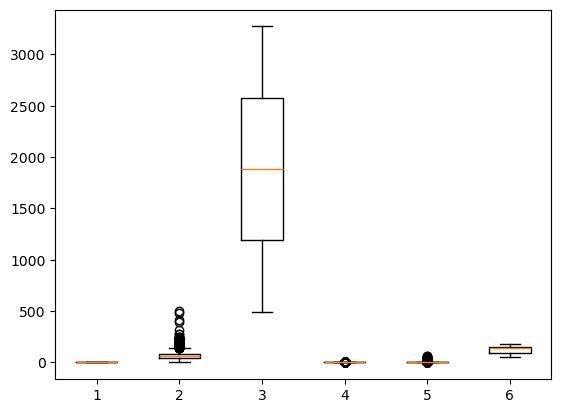

In [172]:
plt.boxplot(num_df)
plt.show

In [174]:
def replace_outliers(data, column_name):
    q1=data[column_name].quantile(0.25)
    q3=data[column_name].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    data[column_name]=data[column_name].clip(lower=lower_bound)
    data[column_name]=data[column_name].clip(upper=upper_bound)
    return data[column_name]

In [176]:
for col in num_df:
    num_df[col]=replace_outliers(num_df, col)

<function matplotlib.pyplot.show(close=None, block=None)>

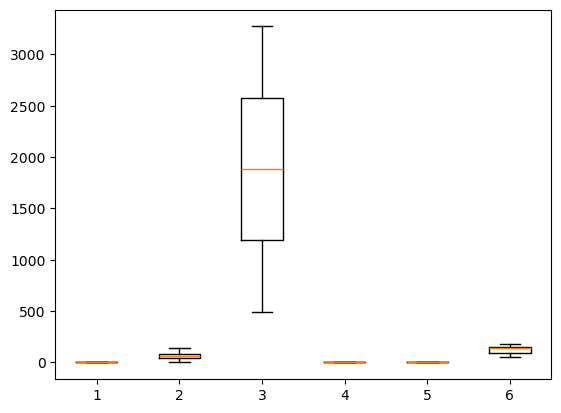

In [178]:
plt.boxplot(num_df)
plt.show

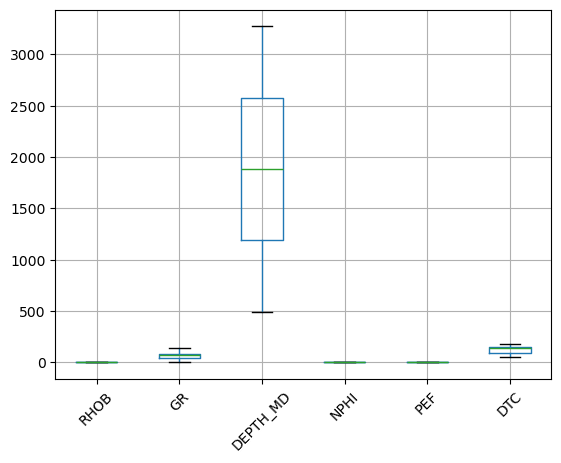

In [180]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

### Step 2: Try K-Means Clustering on the data and visualize the output

In [183]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [185]:
data=pd.read_csv("H:\\data science\\Case_study\\force2020_data.csv")
data.head()

RHOB         GR  DEPTH_MD  NPHI        PEF         DTC
0  1.884186  80.200851   494.528   NaN  20.915468  161.131180
1  1.889794  79.262886   494.680   NaN  19.383013  160.603470
2  1.896523  74.821999   494.832   NaN  22.591518  160.173615
3  1.891913  72.878922   494.984   NaN  32.191910  160.149429
4  1.880034  71.729141   495.136   NaN  38.495632  160.128342

In [187]:
X=data[['GR', 'DEPTH_MD']]
X.head()

GR  DEPTH_MD
0  80.200851   494.528
1  79.262886   494.680
2  74.821999   494.832
3  72.878922   494.984
4  71.729141   495.136

In [189]:
from sklearn.cluster import KMeans

In [191]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

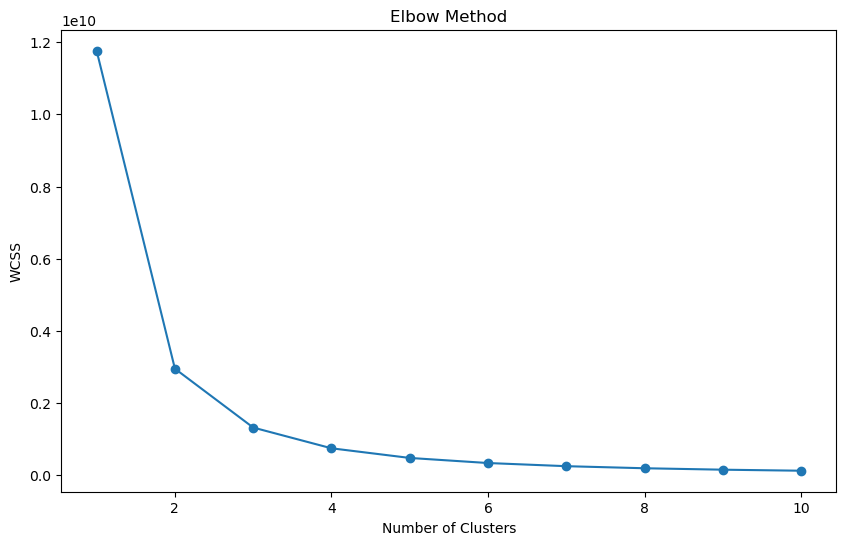

In [192]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [194]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [197]:
data['Cluster'] = y_kmeans
data.head()

RHOB         GR  DEPTH_MD  NPHI        PEF         DTC  Cluster
0  1.884186  80.200851   494.528   NaN  20.915468  161.131180        1
1  1.889794  79.262886   494.680   NaN  19.383013  160.603470        1
2  1.896523  74.821999   494.832   NaN  22.591518  160.173615        1
3  1.891913  72.878922   494.984   NaN  32.191910  160.149429        1
4  1.880034  71.729141   495.136   NaN  38.495632  160.128342        1

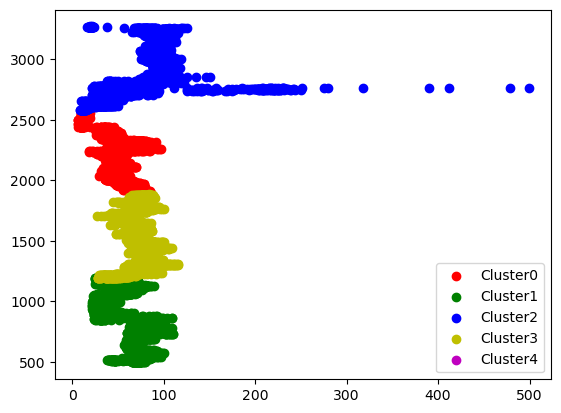

In [199]:
colors = ['r','g','b','y','m']

for i in range(5):
  cluster_data = X[y_kmeans ==i]
  plt.scatter(cluster_data['GR'],
              cluster_data['DEPTH_MD'],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [200]:
def predict_cluster(GR, DEPTH_MD):
  new_data = [[GR, DEPTH_MD]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [203]:
new_fish_Weight = 290
new_fish_Length = 24

predicted_cluster = predict_cluster(new_fish_Weight,new_fis_Length)
print(f'The fish belongs to cluster: {predicted_cluster}')

NameError: name 'new_fis_Length' is not defined